**Лабораторная работа №7**
Решить краевую задачу для дифференциального уравнения эллиптического типа. Аппроксимацию уравнения произвести с использованием центрально-разностной схемы. Для решения дискретного аналога применить следующие методы: метод простых итераций (метод Либмана), метод Зейделя, метод простых итераций с верхней релаксацией. Вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x,y)$. Исследовать зависимость погрешности от сеточных параметров $h_x, h_y$

$\frac{\partial^2u}{\partial x^2} + \frac{\partial^2u}{\partial y^2} = -2\frac{\partial u}{\partial x}-3u$,

$u(0,y) = \cos{y}$,

$u(\frac{\pi}{2}, y) = 0$,

$u(x,0) = e^{-x}\cos{x}$,

$u(x, \frac{\pi}{2}) = 0$.

Аналитическое решение: $U(x,y)=e^{-x}\cos{x}\cos{y}$

In [25]:
import copy
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [26]:
def analytic_solution(x, y):
    return np.exp(-x) * np.cos(x) * np.cos(y)

def phi1(y):
    return np.cos(y)

def phi2(y):
    return 0

def phi3(x):
    return np.exp(-x) * np.cos(x)

def phi4(x):
    return 0

In [27]:
def show_result(y_axis, x_axis, u1, u2, u3):
    fig, axes = plt.subplots(1, 4, figsize=(20, 6), subplot_kw={"projection": "3d"})
    fig.suptitle("Численные решения и аналитическое решение", fontsize=16)

    # Создание сетки
    xgrid, ygrid = np.meshgrid(x_axis, y_axis)

    # Построение графиков для каждого метода
    solutions = [
        (analytic_solution(xgrid, ygrid), "Liebmann method", "plasma"),
        (analytic_solution(xgrid, ygrid), "Seidel method", "coolwarm"),
        (analytic_solution(xgrid, ygrid), "Successive over-relaxation", "cividis"),
        (analytic_solution(xgrid, ygrid), "Analytic", "viridis"),
    ]

    for ax, (solution, title, cmap) in zip(axes, solutions):
        surf = ax.plot_surface(
            xgrid, ygrid, solution, cmap=cmap, alpha=0.8
        )
        ax.set_title(title, fontsize=12)
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("u")

    # Общий график со всеми решениями
    fig_all = plt.figure(figsize=(10, 8))
    ax_all = fig_all.add_subplot(111, projection="3d")
    fig_all.suptitle("Общий график всех решений", fontsize=16)

    # Общие графики на одном графике
    ax_all.plot_surface(xgrid, ygrid, analytic_solution(xgrid, ygrid), cmap="plasma", alpha=0.6, label="Liebmann")
    ax_all.plot_surface(xgrid, ygrid, analytic_solution(xgrid, ygrid), cmap="coolwarm", alpha=0.6, label="Seidel")
    ax_all.plot_surface(
        xgrid, ygrid, analytic_solution(xgrid, ygrid), cmap="cividis", alpha=0.6, label="Successive over-relaxation"
    )
    ax_all.plot_surface(xgrid, ygrid, analytic_solution(xgrid, ygrid), cmap="viridis", alpha=0.7, label="Analytic")
    ax_all.set_xlabel("x")
    ax_all.set_ylabel("y")
    ax_all.set_zlabel("u")

    # Отображение всех графиков
    plt.show()

def show_inaccuracy(y_axis, x_axis, u1, u2, u3):
    inaccuracy1 = np.zeros(count_x + 1)
    inaccuracy2 = np.zeros(count_x + 1)
    inaccuracy3 = np.zeros(count_x + 1)
    for i in range(count_x + 1):
        inaccuracy1[i] = np.max(
            np.abs(u1[i] - np.array([analytic_solution(x_axis[i], y) for y in y_axis]))
        )
        inaccuracy2[i] = np.max(
            np.abs(u2[i] - np.array([analytic_solution(x_axis[i], y) for y in y_axis]))
        )
        inaccuracy3[i] = np.max(
            np.abs(u3[i] - np.array([analytic_solution(x_axis[i], y) for y in y_axis]))
        )

    plt.figure(figsize=(14, 8))
    plt.plot(x_axis[1:], inaccuracy1[1:], "violet", label="Метод Либмана")
    plt.plot(x_axis[1:], inaccuracy2[1:], "pink", label="Метод Зейделя")
    plt.plot(x_axis[1:], inaccuracy3[1:], "blue", label="Метод Либмана с верхней релаксацией")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper right", borderaxespad=0.0)
    plt.title("График изменения ошибки")
    plt.xlabel("y")
    plt.ylabel("error")
    plt.grid(True)
    plt.show()

In [28]:
count_x = 10
count_y = 10
lx = np.pi / 2
ly = np.pi / 2
hx = lx / count_x
hy = ly / count_y
bx = 2
by = 0
c = 3
eps = 0.001
max_iterations = 1000

In [29]:
def liebmann_method():
    u = np.zeros((count_x + 1, count_y + 1))

    u[0, 0] = phi1(0)
    u[-1, -1] = phi2(-hy)

    for i in range(1, count_x):
        u[i, 0] = phi3(i * hx)
        u[i, -1] = phi4(i * hx)

    for j in range(1, count_y):
        u[0, j] = phi1(j * hy)
        u[-1, j] = phi2(j * hy)
        for i in range(1, count_x):
            u[i, j] = u[0, j] + (u[-1, j] - u[0, j]) / lx * i * hx

    k = 0
    while True:
        k += 1
        if k > max_iterations:
            print("Достигнуто максимальное число итераций!")
            break

        u_prev = copy.deepcopy(u)

        for j in range(1, count_y):
            for i in range(1, count_x):
                u[i, j] = (
                    -(u_prev[i + 1, j] + u_prev[i - 1, j])
                    - hx**2 * (u_prev[i, j + 1] + u_prev[i, j - 1]) / (hy**2)
                    - bx * hx * (u_prev[i + 1, j] - u_prev[i - 1, j]) / 2
                    - by * hx**2 * (u_prev[i, j + 1] - u_prev[i, j - 1]) / (2 * hy)
                ) / (c * hx**2 - 2 * (hy * hy + 1 * hx**2) / (hy**2))

        norm = np.linalg.norm(u - u_prev, np.inf)
        if norm <= eps:
            break

    print("liebmann_method: k =", k)
    return u


def sor_method(omega):
    u = np.zeros((count_x + 1, count_y + 1))

    u[0, 0] = phi1(0)
    u[-1, -1] = phi2(hy)

    for i in range(1, count_x):
        u[i, 0] = phi3(i * hx)
        u[i, -1] = phi4(i * hx)

    for j in range(1, count_y):
        u[0, j] = phi1(j * hy)
        u[-1, j] = phi2(j * hy)
        for i in range(1, count_x):
            u[i, j] = u[0, j] + (u[-1, j] - u[0, j]) / lx * i * hx

    k = 0
    while True:
        k = k + 1
        if k > max_iterations:
            print("Достигнуто максимальное число итераций!")
            break

        u_prev = copy.deepcopy(u)

        for j in range(1, count_y):
            for i in range(1, count_x):
                u[i, j] = (
                    (
                        -(u_prev[i + 1, j] + u[i - 1, j])
                        - 1 * hx**2 * (u_prev[i, j + 1] + u[i, j - 1]) / (hy**2)
                        - bx * hx * (u_prev[i + 1, j] - u[i - 1, j]) / 2
                        - by * hx**2 * (u_prev[i, j + 1] - u[i, j - 1]) / (2 * hy)
                    )
                    / (c * hx**2 - 2 * (hy**2 + 1 * hx**2) / (hy**2))
                ) * omega + (1 - omega) * u_prev[i, j]

        norm = np.linalg.norm(u - u_prev, np.inf)
        if norm <= eps:
            break
    if omega == 1:
        print("zeildel_method: k =", k)
    else:
        print("sor_method: k =", k)
    return u

def get_axis_np(count, mul):
    axis = np.zeros(count)
    for i in range(count):
        axis[i] = mul * i
    return axis

liebmann_method: k = 100
zeildel_method: k = 61
sor_method: k = 24


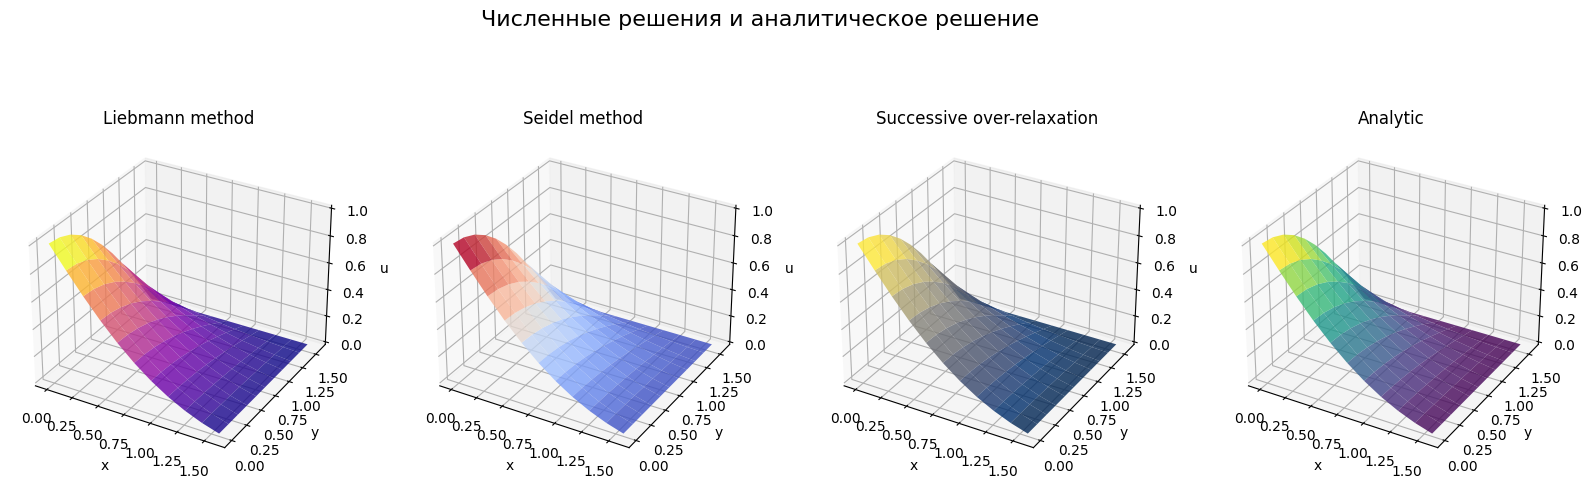

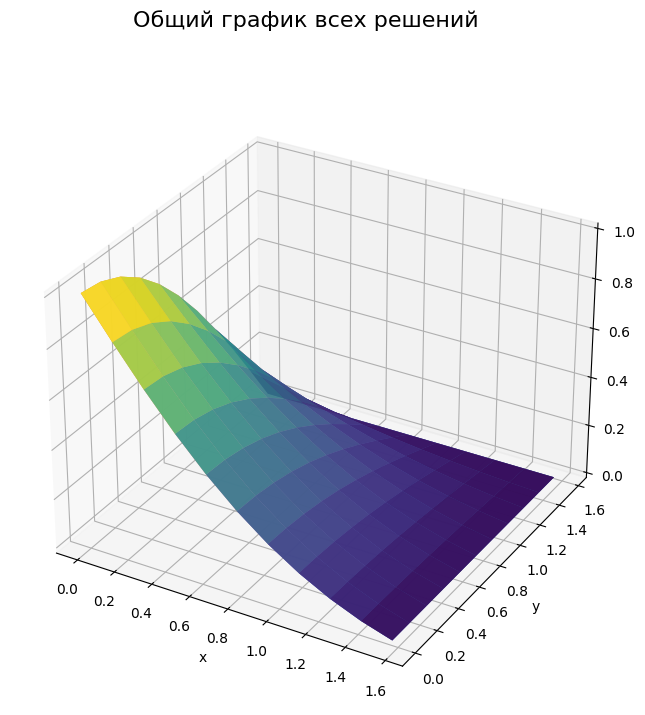

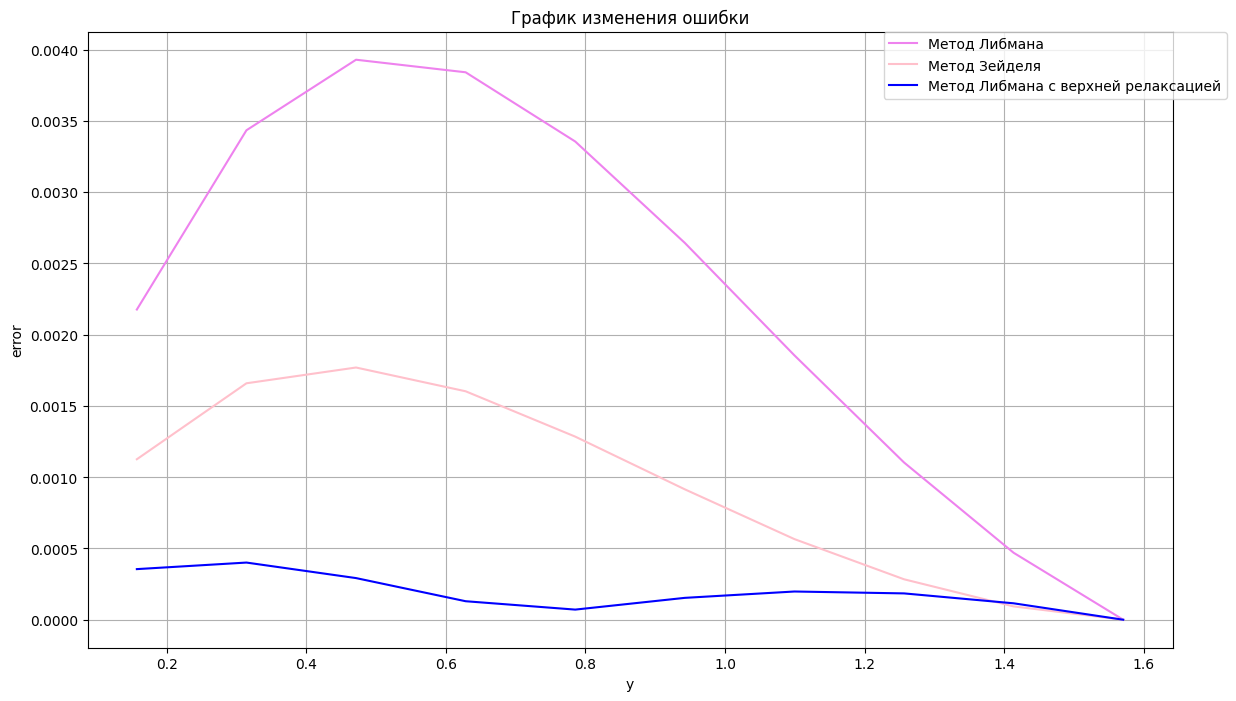

In [30]:
u1 = liebmann_method()
u2 = sor_method(1)
u3 = sor_method(1.5)

y_axis = get_axis_np(count_y + 1, hy)
x_axis = get_axis_np(count_x + 1, hx)

show_result(y_axis, x_axis, u1, u2, u3)
show_inaccuracy(y_axis, x_axis, u1, u2, u3)